In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import subprocess
%matplotlib inline

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.applications.xception import Xception, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import SGD

In [4]:
path = Path.cwd()
data_dir = path / 'data'
print(data_dir)

/Users/angelo/Programming/Python/alexey-grigorev/ml-zoomcamp/2023/homework/08/data


In [5]:
dataset_url = 'https://github.com/SVizor42/ML_Zoomcamp/releases/download/bee-wasp-data/data.zip'
if not data_dir.exists():
    subprocess.run(['wget', dataset_url])
    subprocess.run(['unzip', 'data.zip'])

(1, 240, 320, 3)


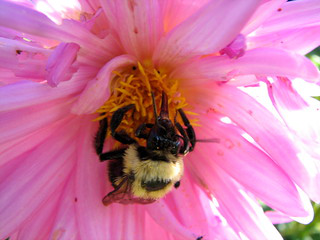

In [6]:
path = data_dir / 'train/bee/'
name = '210144361_aac82685de_n.jpg'
fullname = path / name
img = load_img(fullname)
x = np.array(img)
X = np.array([x])
print(X.shape)
img

In [7]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds = train_gen.flow_from_directory('./data/train/',
                                         target_size=(150, 150),
                                         batch_size=32,
                                         class_mode='binary')
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_ds = test_gen.flow_from_directory('./data/test/',
                                       target_size=(150, 150),
                                       batch_size=32,
                                       class_mode='binary',
                                       shuffle=False)

Found 3677 images belonging to 2 classes.
Found 918 images belonging to 2 classes.


In [8]:
print(train_ds.class_indices)
print(test_ds.class_indices)

{'bee': 0, 'wasp': 1}
{'bee': 0, 'wasp': 1}


In [9]:
batch_data, batch_labels = train_ds.next()
print(f"Shape of batch_data for batch: {batch_data.shape}")
print(f"Shape of batch_labels for batch: {batch_labels.shape}")

Shape of batch_data for batch: (32, 150, 150, 3)
Shape of batch_labels for batch: (32,)


In [10]:
input_shape = (150, 150, 3)
learning_rate=0.002
momentum=0.8

In [11]:
model = Sequential()
model.trainable = True
model.add(Input(shape=input_shape))
model.add(Conv2D(filters=32,
                 kernel_size=(3, 3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-trainable params: 0
____________________________________________

In [13]:
loss='binary_crossentropy'
model.compile(optimizer = SGD(learning_rate=learning_rate, momentum=0.8),
              loss=loss, metrics = ['accuracy'])

In [14]:
model.fit(train_ds, validation_data=test_ds, epochs=4)

Epoch 1/4
115/115 [==============================] - 26s 226ms/step - loss: 0.6219 - accuracy: 0.6350 - val_loss: 0.5483 - val_accuracy: 0.7146
Epoch 2/4
115/115 [==============================] - 26s 226ms/step - loss: 0.5233 - accuracy: 0.7444 - val_loss: 0.5247 - val_accuracy: 0.7309
Epoch 3/4
115/115 [==============================] - 27s 234ms/step - loss: 0.4721 - accuracy: 0.7811 - val_loss: 0.5021 - val_accuracy: 0.7582
Epoch 4/4
115/115 [==============================] - 28s 247ms/step - loss: 0.4261 - accuracy: 0.8102 - val_loss: 0.5217 - val_accuracy: 0.7375


### Question 1

Since we have a binary classification problem, what is the best loss function for us?

* `mean squared error`
* `binary crossentropy`
* `categorical crossentropy`
* `cosine similarity`